In [1]:
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import string
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
amazon = pd.read_csv("C:\\Users\\Square Bear\\Documents\\Thinkful\\Datasets\\sentiment labelled sentences\\amazon_cells_labelled.txt", delimiter= '\t', header=None)
amazon.columns = ['review', 'sentiment']

In [3]:
amazon.head()


,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [4]:
amazon_positive = amazon[amazon['sentiment']==1]
amazon_negative = amazon[amazon['sentiment']==0]

In [5]:
amazon_positive.describe()

,sentiment
count,500.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [6]:
amazon_positive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 978
Data columns (total 2 columns):
review       500 non-null object
sentiment    500 non-null int64
dtypes: int64(1), object(1)
memory usage: 11.7+ KB


In [7]:
amazon_negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 999
Data columns (total 2 columns):
review       500 non-null object
sentiment    500 non-null int64
dtypes: int64(1), object(1)
memory usage: 11.7+ KB


In [8]:
amazon_positive.head(10)

,review,sentiment
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
4,The mic is great.,1
7,If you are Razr owner...you must have this!,1
10,And the sound quality is great.,1
11,He was very impressed when going from the orig...,1
13,Very good quality though,1
15,Highly recommend for any one who has a blue to...,1
17,So Far So Good!.,1
18,Works great!.,1


In [9]:
keywords = ['great', 'good', 'excellent', 'must have', 'quality', 'impressed', 'highly recommend']

amazon['all_lower'] = amazon.review.str.lower()

amazon.head()


,review,sentiment,all_lower
0,So there is no way for me to plug it in here i...,0,so there is no way for me to plug it in here i...
1,"Good case, Excellent value.",1,"good case, excellent value."
2,Great for the jawbone.,1,great for the jawbone.
3,Tied to charger for conversations lasting more...,0,tied to charger for conversations lasting more...
4,The mic is great.,1,the mic is great.


In [10]:
for key in keywords:
     amazon[str(key)] = amazon.all_lower.str.contains(
         str(key) ,
        case=False
    )

In [11]:
amazon.head(10)

,review,sentiment,all_lower,great,good,excellent,must have,quality,impressed,highly recommend
0,So there is no way for me to plug it in here i...,0,so there is no way for me to plug it in here i...,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,"good case, excellent value.",False,True,True,False,False,False,False
2,Great for the jawbone.,1,great for the jawbone.,True,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,tied to charger for conversations lasting more...,False,False,False,False,False,False,False
4,The mic is great.,1,the mic is great.,True,False,False,False,False,False,False
5,I have to jiggle the plug to get it to line up...,0,i have to jiggle the plug to get it to line up...,False,False,False,False,False,False,False
6,If you have several dozen or several hundred c...,0,if you have several dozen or several hundred c...,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,1,if you are razr owner...you must have this!,False,False,False,True,False,False,False
8,"Needless to say, I wasted my money.",0,"needless to say, i wasted my money.",False,False,False,False,False,False,False
9,What a waste of money and time!.,0,what a waste of money and time!.,False,False,False,False,False,False,False


In [12]:
#amazon['sentiment'] = (amazon['sentiment'] == 1)

amazon.head()

,review,sentiment,all_lower,great,good,excellent,must have,quality,impressed,highly recommend
0,So there is no way for me to plug it in here i...,0,so there is no way for me to plug it in here i...,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,"good case, excellent value.",False,True,True,False,False,False,False
2,Great for the jawbone.,1,great for the jawbone.,True,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,tied to charger for conversations lasting more...,False,False,False,False,False,False,False
4,The mic is great.,1,the mic is great.,True,False,False,False,False,False,False


In [13]:
data = amazon[keywords]
target = amazon['sentiment']

In [14]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 337


In [15]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(data, target)
y_pred_log = log.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred_log).sum()
))

Number of mislabeled points out of a total 1000 points : 337


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


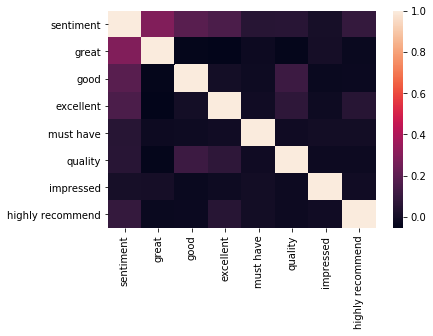

In [30]:
sns.heatmap(amazon.corr())

In [20]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=.2)

x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 132 to 749
Data columns (total 7 columns):
great               800 non-null bool
good                800 non-null bool
excellent           800 non-null bool
must have           800 non-null bool
quality             800 non-null bool
impressed           800 non-null bool
highly recommend    800 non-null bool
dtypes: bool(7)
memory usage: 11.7 KB


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clrTree = DecisionTreeClassifier() 
clrTree = clrTree.fit(x_train, y_train) 
outTree = clrTree.predict(x_test)

clrKN = KNeighborsClassifier() 
clrKN = clrKN.fit(x_train, y_train) 
outKN = clrKN.predict(x_test)

print("Accuracy for Decision Tree Classifier: " + str(accuracy_score(y_test, outTree)*100)+"%") 
print("Accuracy for KNeighbors Classifier: " + str(accuracy_score(y_test, outKN)*100)+"%")


Accuracy for Decision Tree Classifier: 69.5%
Accuracy for KNeighbors Classifier: 70.5%


In [28]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
y_pred = bnb.predict(x_test)

print("Number of mislabeled points out of a total {} points : {}".format(
    x_test.shape[0],
    (y_test != y_pred).sum()
))
print("Accuracy for KNeighbors Classifier: " + str(accuracy_score(y_test, y_pred)*100)+"%")


Number of mislabeled points out of a total 200 points : 61
Accuracy for KNeighbors Classifier: 69.5%


In [29]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
y_pred_log = log.predict(x_test)
print("Number of mislabeled points out of a total {} points : {}".format(
    x_test.shape[0],
    (y_test != y_pred_log).sum()
))
print("Accuracy for KNeighbors Classifier: " + str(accuracy_score(y_test, y_pred_log)*100)+"%")


Number of mislabeled points out of a total 200 points : 61
Accuracy for KNeighbors Classifier: 69.5%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
